<a href="https://colab.research.google.com/github/sarathi-vs13/Deep-Learning/blob/main/Image_classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [3]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Modified national institute of Standards and Technology
fashion_mnist = keras.datasets.fashion_mnist

In [8]:
#Load data
(train_im, train_la), (test_im, test_la) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
#Normalize the data
train_im2 = train_im/255
test_im2 = test_im/255

In [16]:
train_im.shape

(60000, 28, 28)

In [17]:
train_im

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [20]:
#Verify a sample data after normalizing
train_im2[100] [15] [20]

np.float64(0.6509803921568628)

In [21]:
#Test shape
test_im2.shape

(10000, 28, 28)

In [23]:
#Get unique labels from train and test

set(train_la), set(test_la)

({np.uint8(0),
  np.uint8(1),
  np.uint8(2),
  np.uint8(3),
  np.uint8(4),
  np.uint8(5),
  np.uint8(6),
  np.uint8(7),
  np.uint8(8),
  np.uint8(9)},
 {np.uint8(0),
  np.uint8(1),
  np.uint8(2),
  np.uint8(3),
  np.uint8(4),
  np.uint8(5),
  np.uint8(6),
  np.uint8(7),
  np.uint8(8),
  np.uint8(9)})

In [24]:
#Class name to label images while vizualization
class_name = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boat']

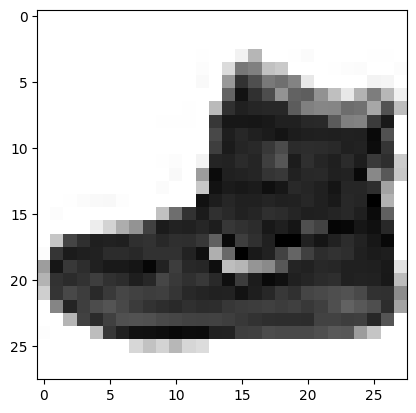

In [27]:
plt.figure()
plt.imshow(train_im[0], cmap=plt.cm.binary)

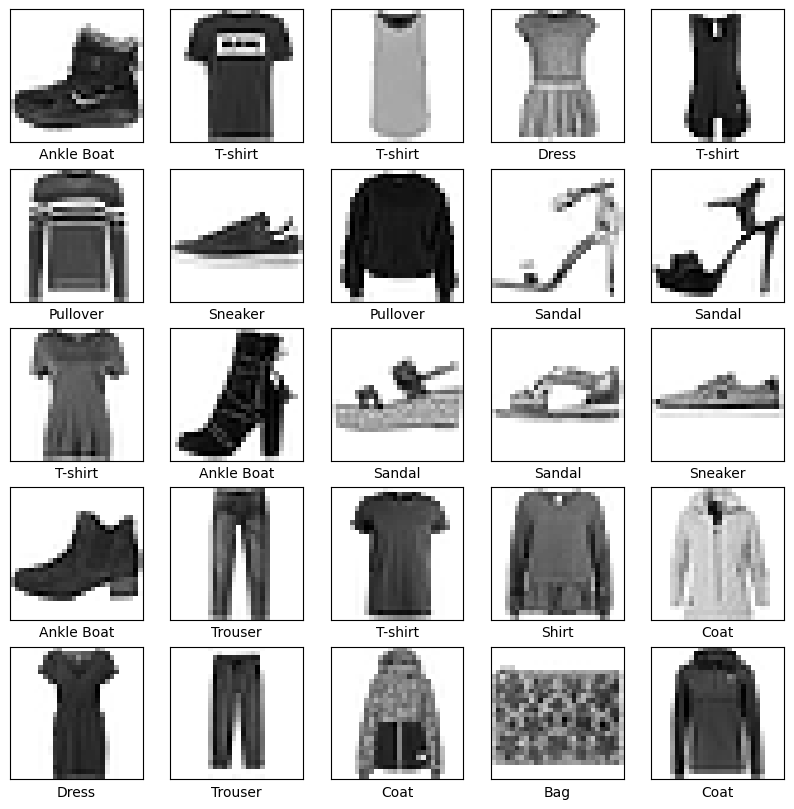

In [29]:
#Viewing sample  of 25 images from training dataset
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_im[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_la[i]])

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    #keras.layers.Dropout(0.2)
    keras.layers.Dense(10, activation=tf.nn.softmax)

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [34]:
history = model.fit(train_im2, train_la, epochs= 10, validation_data=[test_im,test_la])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7891 - loss: 0.5913 - val_accuracy: 0.8217 - val_loss: 63.5679
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8657 - loss: 0.3600 - val_accuracy: 0.8464 - val_loss: 53.9105
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8786 - loss: 0.3256 - val_accuracy: 0.8312 - val_loss: 71.6491
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8882 - loss: 0.3008 - val_accuracy: 0.8724 - val_loss: 45.8910
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8939 - loss: 0.2806 - val_accuracy: 0.8693 - val_loss: 43.8433
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9011 - loss: 0.2612 - val_accuracy: 0.8544 - val_loss: 49.7210
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9060 - loss: 0.2491 - val_accuracy: 0.8473 - val_loss: 62.3984
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9086 - 

In [37]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.829000,0.470511,0.8217,63.567944
1,0.867217,0.357548,0.8464,53.910500
2,0.880600,0.322875,0.8312,71.649117
3,0.888900,0.299904,0.8724,45.890980
4,0.894083,0.281826,0.8693,43.843273
5,0.898650,0.267555,0.8544,49.721004
6,0.904333,0.255484,0.8473,62.398430
7,0.907717,0.242261,0.8554,57.387268
8,0.910450,0.233532,0.8589,54.977444
9,0.913900,0.225217,0.8581,62.749855


In [35]:

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
#     hist = hist[hist['epoch'] % 100 ==0 ]
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Validation Accuracy')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
#     plt.ylim([0,15])
    plt.legend()
    plt.show()



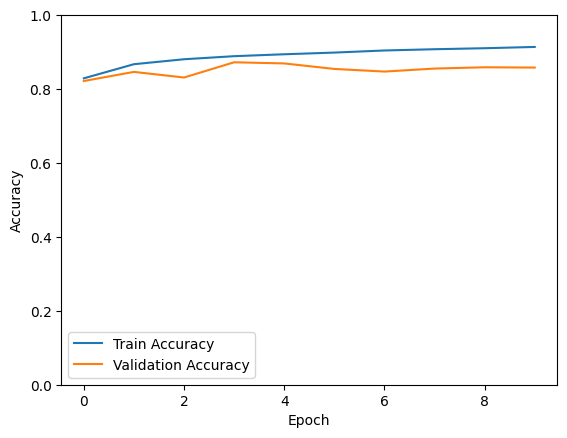

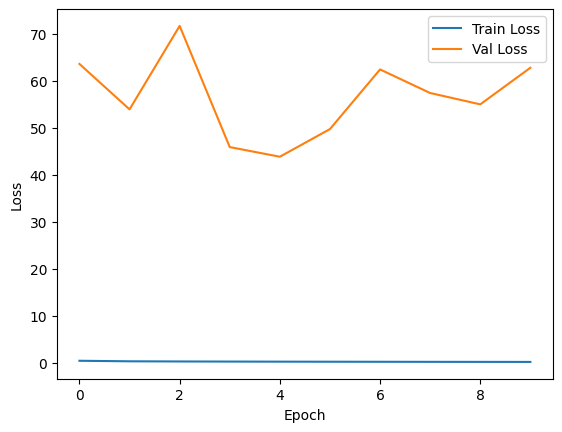

In [36]:
plot_history(history)

In [67]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_im, test_la)
print('test accuracy', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8592 - loss: 59.9955
test accuracy 0.8580999970436096


In [68]:
#Predicting the class for a new image
predictions = model.predict(test_im)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [41]:
predictions.shape

(10000, 10)

In [69]:
#Probabilities of an image
predictions[8]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.99999994, 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [65]:
#Index of the highest probability
np.argmax(predictions[8])

np.int64(5)

In [71]:
#Class name of the index
class_name[np.argmax(predictions[5])]

'Trouser'

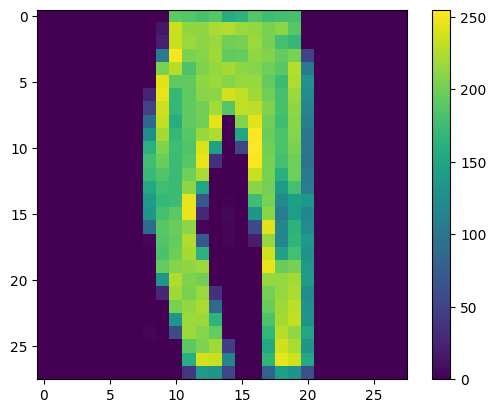

In [72]:
# Plot the image and verify if our predection is correct
plt.figure()
plt.imshow(test_im[5])
plt.colorbar()